<a href="https://colab.research.google.com/github/RPGraciotti/BootCampAlura/blob/main/Projeto_final/Avalia%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estrutura

1. Introdução
2. Importação de bibliotecas e definição de funções
3. Importação dos dados
4. Aplicação da avaliação
5. Conclusões



# Introdução - Avaliação dos modelos/pipelines

Após a etapa anterior de busca dos melhores pipelines, é hora de examinar a fundo quais os modelos escolhidos, quais os parâmetros, e determinar se os modelos são de fato bons modelos e qual seria o pipeline escolhido.

A busca inicial foi feita com base em parâmetros de validação de modelos de Machine Learning. Existe uma [vasta literatura](https://scholar.google.com/scholar?hl=pt-BR&as_sdt=0%2C5&q=evaluation+machine+learning+models&btnG) sobre quais as melhores ferramentas, e quais a melhores formas de se avaliar a qualidade de um modelo de Machine Learning, e é sempre um tópico [bastante debatido](https://scholar.google.com/scholar?as_ylo=2021&q=evaluation+machine+learning+models&hl=pt-BR&as_sdt=0,5).



## Métricas

As métricas de avaliação escolhidas derivam do conceito de matriz de confusão. A matriz de confusão é uma matriz simétrica que representa a distribuição de acertos e erros de predição do modelo. A forma como os eixos são organizados pode variar, mas nesse exemplo vemos o mesmo padrão utilizado pelo sklearn: no eixo x temos os valores preditos e no eixo y os valores reais.

![exemplo de matriz de confusão](https://github.com/RPGraciotti/BootCampAlura/raw/main/Projeto_final/figs/matrix_2.jpeg)

**Fonte** : https://towardsdatascience.com/classification-metrics-confusion-matrix-explained-7c7abe4e9543

A partir dos valores 
> TP - True Positives (verdadeiros positivos)

> FP - False Positives (falsos positivos)

> FN - False Negatives (falsos negativos)

> TN - True Negatives (verdadeiros negativos)

podemos calcular uma série de métricas. As principais [métricas de avaliação](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) escolhidas foram a Acurácia, a Precisão, a curva ROC-AUC, Recall e F1 Score.

A **acurácia** é a taxa ```(TP + TN)/(TP + FP + TN + FN)``` mede quantas classificações feitas pelo modelo nos dados de treino correspondem *exatamente* ao valor real nos dados de teste.

A **precisão** é a taxa ```TP/(TP + FP)``` que mede a capacidade do modelo não classificar um valor positivo como negativo.

O **recall** é a taxa ```TP/(TP + FN)``` que mede a habilidade do modelo recuperar todos os valores positivos dos dados de treino.

O **F1** é a média harmônica entre a precisão e recall e geralmente é utilizado com uma avaliação rápida da performance geral do modelo.

A **ROC-AUC (Area Under Receiver Operating Characteristic Curve)** é uma métrica que mostra como varia a taxa de verdadeiro positivo ```TP/(TP + FN)``` em função de falso positivo ```FP/(FP + TN)```. É expressa com a área sob essa curva.

Todas as classes de métricas variam de 0 a 1, com o melhor resultado possível sendo o mais próximo de 1.

[Outra explicação resumida sobre métricas de avaliação](https://towardsdatascience.com/various-ways-to-evaluate-a-machine-learning-models-performance-230449055f15).




Outra forma de avaliar graficamente a performance dos modelos, é a inspeção de duas curvas: a própria [curva ROC e a curva Precision-Recall (PC)](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/).

Como dito, a curva ROC é a taxa de verdadeiros positivos em função da taxa de falsos positivos. Quando lidamos com classificações binárias, o resultado é uma predição correta, ou uma predição negativa. De um modelo "habilidoso" espera-se que em média, ele acerte mais vezes do que erre, certo? A curva ROC descreve esse comportamento: um modelo nulo, em que as previsões são completamente aleatórias, é representado por uma reta diagonal. Quanto mais distante dessa reta, em direção ao canto superior esquerdo for a curva de um modelo, melhor a performance deste.

A curva Precision-Recall por sua vez, é muito utilizada em modelos com resultados não balanceados, em que há desproporcionalmente mais valores 0 do que que valores 1, como é o nosso caso. Ao plotar a precisão em função do recall, estamos examinando o comportamento do modelo em estimar corretamente a classe minoritária, os valores 1 (em que há a necessidade de internação em leito de UTI). Um modelo nulo é representado como uma reta constante no eixo y, variando a posição dependendo do quão desbalanceado ou não é o conjunto de dados. Um modelo de boa performance é representado por uma curva que caminha em direção ao ponto (1,1), mantendo-se acima da curva do modelo nulo.

É interessante a comparação entre essas duas curvas, [pois ambas acabam por descrever aspectos diferentes do modelo](https://dl.acm.org/doi/10.1145/1143844.1143874), embora ambas tenham por objetivo caracterizar a performance deste. Em dados desbalanceados, a curva Precision-Recall pode oferecer uma leitura melhor da peformance do modelo em relação à curva ROC.

## Modelos de árvores de decisão de floresta aleatória
Uma outra observação importante a ser feita é que todos os modelos selecionados são do mesmo tipo, de "floresta aleatória de árvores de decisão", ou [**Random Forest**](https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/); com apenas diferenças entre os hiperparâmetros ou etapas de pré-processamento. Cabe então descrever o que é um algoritmo desse tipo. Em sua essência, é um método do tipo "ensemble", que combina diversos outros modelos, no caso, modelos individuais de árvores de decisão. Uma árvore de decisão é um modelo composto por 3 elementos: a raíz, nós de decisão, e nós de escolha ("folhas"). A cada passo, os dados são separados de acordo com um critério de decisão baseado nas features do conjunto de dados. Por exemplo, o primeiro nó de decisão pode ser, no nosso caso, "O paciente tem mais de 65 anos?". Os dados serão separados conforme essa feature, e uma nova decisão é tomada, até que não seja mais possível separar os dados e o resultado seja a previsão final (no caso, uma classificação binária). 

![Exemplo de uma árvore de decisão](https://github.com/RPGraciotti/BootCampAlura/raw/main/Projeto_final/figs/decision-tree-nodes.png)

Os critérios adotados para definir a melhor forma de separar os dados, a ordem com que as features são testadas, a profundidade de árvore (número de etapas) são todos parâmetros do modelo. O que o Random Forest faz é, em essência, criar várias árvores diferentes, com parâmetros diferentes, aleatorizando a forma como as features são ordenadas em cada árvore. Ao final, o algoritmo busca o resultado de cada árvore individualmente como uma "votação" para determinar o resultado final, o mais "votado" é o resultado escolhido:

![Exemplo de Random Forest](https://github.com/RPGraciotti/BootCampAlura/raw/main/Projeto_final/figs/random-forest-classifier.png)

Podemos iniciar então nosso roteiro de avaliação:

# Instalação da biblioteca, importação e funções
## Instalação

In [1]:
#pip install tpot silenciado na geração de notebook para visualização no github

## Importação

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline

from tpot.builtins import StackingEstimator
from tpot.builtins import ZeroCount
from tpot.export_utils import set_param_recursive

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import SelectPercentile, f_classif, SelectFwe

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


import warnings

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Definição de funções

In [3]:
# Função que aplica o mesmo split para padronizar a avaliação dos modelos
def set_split(data, random_state):
  
  data = data.sample(frac = 1, random_state = random_state).reset_index(drop = True)
  y = data.loc[:,"ICU"]
  y = y.rename("target")
  x = data.drop(["PATIENT_VISIT_IDENTIFIER", "ICU", "WINDOW"], axis = 1)
  split = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = random_state)

  return split

In [4]:
# Função que plota matriz de confusão com parametros personalizados
def plot_confusion_matrix_params(data, model, title, normalize = "all", figsize = (8, 6)):

  cm = confusion_matrix(y_true = data[3], y_pred = model.predict(data[1]), normalize = normalize)
  plt.figure(figsize = figsize)
  ax = plt.subplot()
  sns.heatmap(cm, annot = True, ax = ax, cmap = plt.cm.PuBu, annot_kws  = {"fontsize":14})
  ax.set_title(f"Matriz de Confusão: Modelo {title}", fontsize = 16)
  ax.tick_params(axis = "both", which = "major", labelsize = 15)
  ax.set_xlabel("Label predita", fontsize = 15)
  ax.set_ylabel("Label verdadeira", fontsize = 15)
  plt.show()

In [5]:
# Função que gera os gráficos de avaliação de scores por cross validation
def multi_score_cv(model, x, y, cv, title, set_context = "talk", figsize = (10, 6)):
  with warnings.catch_warnings():
    warnings.simplefilter('ignore') # ignora warnings durante cross_validate
    cv_results = cross_validate(model, x, y, 
                                cv = cv, scoring = ["accuracy","precision", "roc_auc", "recall", "f1"]) # performa cross validate com parametros escolhidos e separa os scorings de itneresse
  
  accuracy = cv_results["test_accuracy"]
  precision = cv_results["test_precision"] 
  roc_auc = cv_results["test_roc_auc"]
  recall = cv_results["test_recall"]
  f1 = cv_results["test_f1"]
  scores = pd.DataFrame(dict(Acurácia = accuracy, Precisão = precision, ROC_AUC = roc_auc, Recall = recall, F1 = f1))
  scores_melt = scores.melt()

  plt.figure(figsize = figsize)
  sns.set_context(set_context)
  sns.boxplot(data = scores_melt, x = "value", y = "variable", linewidth = 2.5)
  plt.title(f"Distribuição de valores de score por CV - Modelo {title}")
  plt.xlabel("")
  plt.xlim(-0.1, 1.1)
  plt.ylabel("Métrica")
  plt.show()
  sns.reset_orig()

  return scores

In [6]:
# Função plot das curvas ROC e Precision-Recall
# de https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

def plot_eval_curves(data, model, title, figsize = (10, 6)):

  # ROC_AUC 
  ns_probs = [0 for _ in range(len(data[3]))]
  lr_probs = model.predict_proba(data[1])
  lr_probs = lr_probs[:, 1]
  ns_auc = roc_auc_score(data[3], ns_probs)
  lr_auc = roc_auc_score(data[3], lr_probs)
  ns_fpr, ns_tpr, _ = roc_curve(data[3], ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(data[3], lr_probs)
  
  plt.figure(figsize = figsize)
  plt.suptitle("Curvas de avaliação", fontsize = 20)
  plt.subplot(1, 2, 1)
  plt.title("Curva ROC", fontsize = 16)
  plt.plot(ns_fpr, ns_tpr, linestyle = '--')
  plt.plot(lr_fpr, lr_tpr, marker = ".", label = f"Modelo {title}")
  plt.xlabel("Taxa de falso positivo", fontsize = 16)
  plt.ylabel("Taxa de verdadeiro positivo", fontsize = 16)
  plt.tick_params(axis = "both", which = "major", labelsize = 14)
  plt.annotate(f"AUC {round(lr_auc, 4)}", xy = (0,0.97), fontsize = 14)

  yhat = model.predict(data[1])
  lr_precision, lr_recall, _ = precision_recall_curve(data[3], lr_probs)
  lr_f1, lr_auc = f1_score(data[3], yhat), auc(lr_recall, lr_precision)
  no_skill = len(data[3][data[3]==1]) / len(data[3])

  plt.subplot(1, 2, 2)
  plt.title("Curva Precision-Recall", fontsize = 16)
  plt.ylim(-0.1,1.1)
  plt.plot([0, 1], [no_skill, no_skill], linestyle = '--', label = "Modelo nulo")
  plt.plot(lr_recall, lr_precision, marker = '.', label = f"Modelo {title}")
  plt.xlabel("Recall", fontsize = 16)
  plt.ylabel("Precisão", fontsize = 16)
  plt.tick_params(axis = "both", which = "major", labelsize = 14)
  plt.legend(fontsize = 14)
  plt.tight_layout(pad = 2)
  plt.subplots_adjust(top = 0.85)
  plt.show()

# Importação dos dados

In [7]:
path = "https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/data_clean_ohe.csv" # usando novamente os dados com one-hot encoding

In [8]:
df_clean = pd.read_csv(path)
df_clean

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,ALBUMIN_MEDIAN,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,OXYGEN_SATURATION_MIN,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,WINDOW,ICU
0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,0,0,0,1,0,0,0,0.605263,-1.0,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,-0.932246,1.000000,-0.835844,-0.914938,-0.704142,-0.77931,-0.754601,-0.875236,0.363636,-0.540721,-0.518519,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.898990,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
1,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0.605263,-1.0,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.912243,-0.742004,-0.958528,-0.780261,0.144654,-0.959849,1.000000,-0.382773,-0.908714,-0.704142,-0.77931,-0.754601,-0.939887,0.363636,-0.399199,-0.703704,0.345679,0.085714,-0.995428,-0.986662,-0.846633,-0.836145,-0.978029,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,0.959596,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.747001,0-2,1
2,3,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0,1,0,0,0,0,0,-0.263158,-1.0,-1.000000,-0.317073,-0.317073,-0.972789,-1.0,0.326531,-0.968861,-0.194030,-0.316589,-0.891993,-0.203354,-0.959849,-0.828421,-0.729239,-0.836100,-0.633136,-0.77931,-0.779141,-0.503592,0.363636,-0.564753,-0.777778,0.580247,0.200000,-0.989549,-0.956555,-0.846633,-0.937349,-0.978029,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.878788,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
3,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0.605263,-1.0,-1.000000,-0.317073,-0.317073,-0.935113,-1.0,0.357143,-0.913659,-0.829424,-0.938084,-0.851024,0.358491,-0.959849,1.000000,-0.702202,-0.641079,-0.704142,-0.77931,-0.754601,-0.990926,0.363636,-0.457944,-0.592593,0.345679,0.142857,-0.998507,-0.991235,-0.846633,-0.903614,-1.000000,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.939394,0.894737,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-0.956805,0-2,0
4,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0.605263,-1.0,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.891012,-0.742004,-0.958528,-0.891993,0.291405,-0.959849,1.000000,-0.706450,-0.340249,-0.704142,-0.77931,-0.754601,-0.997732,0.363636,-0.292390,-0.666667,0.345679,0.085714,-0.997947,-0.988948,-0.846633,-0.884337,-1.000000,-0.037037,-0.538462,-0.537736,-0.525424,-0.196429,0.815789,0.919192,0.842105,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,-0.979798,-0.986481,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2

Para que a avaliação dos modelos ocorra de forma uniforme entre os diferntes pipelines, determinei que o "split" de dados de treino e dados de teste seja o mesmo. Isso é necessário porque algumas das formas de avaliação que utilizei como matriz de confusão e visualização da curva ROC dependem de uma única rodada do modelo. A fim de se utilizar os mesmos dados entre as diferentes rodadas de diferentes modelos, padronizei essa saída com a função ```set_split``` no objeto ```main_split```.

A aplicação da função de validação cruzada por meio de ```RepeatedStratifiedKFold``` a princípio não é necessária que seja a mesma entre as diferentes rodadas, pois o método já incorpora aleatoriedade ao ser repetido n vezes no conjunto de dados. Os mesmos padrões foram adotados durante a busca de modelos: o algoritmo separa o conjunto de dados em 5 partes, com 10 combinações diferentes. A cada rodada, o algoritmo ajusta o modelo em 4 dessas partes, e testa na parte restante. Isso é repetido 10 vezes. Dessa forma, no final, o teste do modelo é realizado 50 vezes, e várias métricas podem ser acessadas. Novamente, busquei os parâmetros de acurácia, precisão, recall, AUC e F1.

In [9]:
main_split = set_split(df_clean, random_state = 78329)

In [10]:
x = df_clean.drop(["PATIENT_VISIT_IDENTIFIER", "ICU", "WINDOW"], axis = 1)
y = df_clean.loc[:,"ICU"]
y = y.rename("target")

In [11]:
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 10)

# Avaliação dos modelos

Aqui, eu chamei cada modelo pelo nome do parâmetro que busquei maximizar, mas o teste é feito examinando todos os parâmetros de todos os modelos. 
A função ```make_pipeline``` facilita a implementação dos pipeline selecionados pelo TPOT:

## Modelo que maximiza acurácia: m1

In [12]:
m1 = make_pipeline(
    Normalizer(norm="l2"),
    RandomForestClassifier(bootstrap=True, criterion="gini", max_features=0.6000000000000001, 
                           min_samples_leaf=15, min_samples_split=15, n_estimators=100, 
                           random_state = 78329)
)

Gerado o modelo, vamos aplicá-lo no conjunto ```main_split```:

In [13]:
m1_eval = m1.fit(X = main_split[0], y = main_split[2])

A primeira visualização do comportamento do modelo é feita através da matriz de confusão:

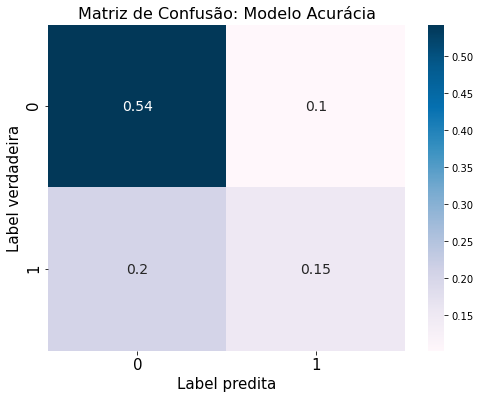

In [14]:
plot_confusion_matrix_params(data = main_split, model = m1_eval, title = "Acurácia")

**Como interpretar a matriz de confusão normalizada?**

Primeiro, a soma de todos os valores é 1 (a representação gráfica costuma arredondar alguns valores para baixo).

Partindo do exemplo da introdução, lendo os quadrantes linha por linha:

> Primeiro temos o valor de TN, ou seja, quantos valores realmente negativos o modelo prediz como negativos;

> Segundo temos o valor de FP, ou seja, quantos valores foram preditos como positivos mas na realidade são negativos;

> Terceiro temos o valor de FN, ou seja, quantos valores foram preditos como negativos mas na realidade são positivos;

> Quarto temos o valor de TP, ou seja, quantos valores realmente positivos foram preditos como positivos.

O objetivo de um bom modelo é maximizar as taxas de verdadeiros (no caso, a diagnonal principal) e minimizar as taxas de falsos. 

**O que temos nesse primeiro exemplo?**

Como padrão geral, veremos que a taxa de verdadeiros negativos é sempre alta. Isso é um bom começo, mas não resume tudo. Neste modelo de busca de melhor acurácia, o desempenho das outras classes é relativamente semelhante. Esse padrão não necessariamente é o ideal, dado que o valor de falsos negativos é bastante alto. Esse é um ponto muito importante do problema em questão: se o modelo tem alta valor de falsos negativos, estamos dizendo que muitas pessoas que precisariam ser internadas em um leito de UTI, não precisam. E isso é um problema bastante grave que, ao meu ver, deve ser minimizado o máximo possível. 

À primeira inspeção, ao menos os valores além de TN não são muito dissimilares, o que indica uma performance ao menos razoável de um modelo.



---


A próxima visualização é a implementação de validação cruzada com estratificação repetida. O algoritmo aplica a estratificação em 5 classes, 10 vezes, totalizando 50 avaliações. O resultado de cada métrica é representado então através de um boxplot:

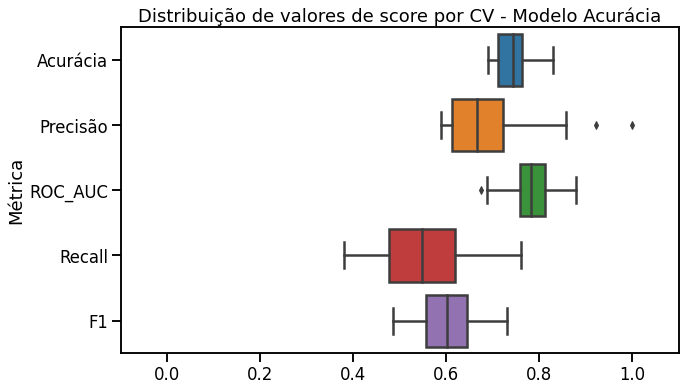

In [15]:
m1_scores = multi_score_cv(model = m1, x = x, y = y, cv = cv,
                           title = "Acurácia")

Neste gráfico, a idéia é que os resultados tenham distribuições parecidas, preferencialmente centradas em valores altos. E, como teste adicional da performance da busca por parâmetros, esperamos que a métrica buscada seja a melhor representada. Podemos ver que as métricas com valores mais altos foram de ROC_AUC e de acurácia. Entretanto, a métrica de Recall é relativamente baixa, empurrando o valor de F1 também para baixo. 

Confirmando o padrão da matriz de confusão, isso indica que este modelo tem uma performance apenas razoável na maioria das vezes, pois incorre em uma taxa não desprezível de falsos negativos, abaixando valor de recall e F1.


---

Por último, vamos examinar o comportamento das curvas ROC-AUC e Precision-Recall.

Recapitulando, a performance dos modelos é medida conforme mais distante é a curva do modelo da curva de modelo nulo: quanto mais curvada em direção ao canto superior esquerdo para a curva ROC, e quanto mais curava em direção ao canto superior direito para a curva Precision-Recall.

Também podemos visualizar o valor de AUC a partir da curva ROC, lemrbando que trata-se da área sob essa curva.

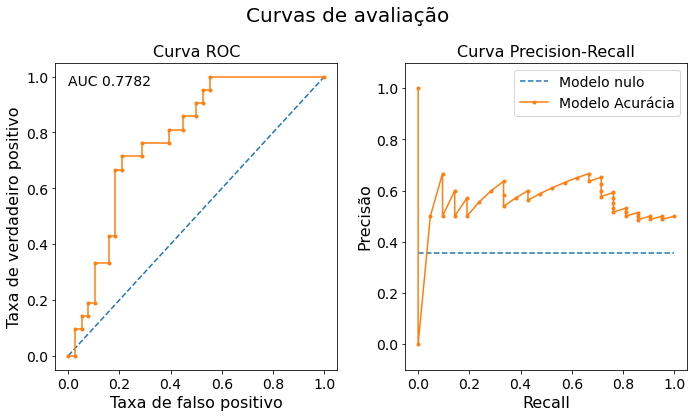

In [16]:
plot_eval_curves(data = main_split, model = m1_eval, title = "Acurácia")

Podemos observar que, por mais que a curva ROC apresente um bom resultado, a curva Precision-Recall não apresenta a forma esperada, ficando relativamente próxima de uma constante, ainda que acima do modelo nulo. Isso indica que esse modelo é penalizado ao prever preferencialmente a classe majoritaria (0 =  não necessita de internação).

A diferença dos padrões resultantes dessas duas curvas já é um forte indicativo de que a performance deste modelo não é a ideal.

## Modelo que maximiza precisão: m2

In [17]:
m2 = RandomForestClassifier(bootstrap=True, criterion="gini", 
                            max_features=0.1, min_samples_leaf=15, min_samples_split=9, n_estimators=100,
                            random_state = 78329)

In [18]:
m2_eval = m2.fit(X = main_split[0], y = main_split[2])

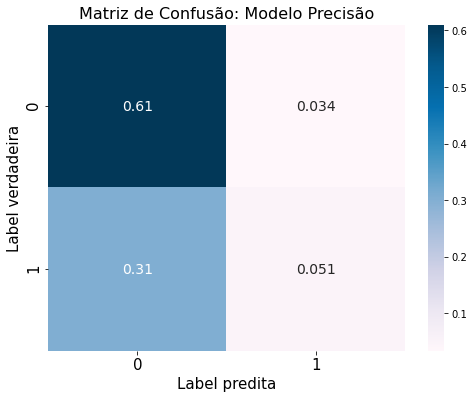

In [19]:
plot_confusion_matrix_params(data = main_split, model = m2_eval, title = "Precisão")

De cara, podemos observar que esse modelo tem um valor muito alto de falsos negativos, e baixo de falsos e verdadeiros positivos. Nessa escala, esse efeito é completamente indesejado, pois buscamos sempre prever o maior número possível de casos verdadeiros de pessoas que necessitam de UTI.

---

Veremos como o modelo se comporta à luz dos outros parâmetros de teste:


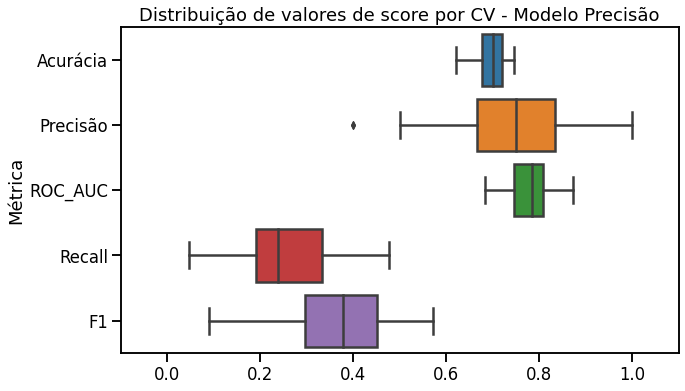

In [20]:
m2_scores = multi_score_cv(model = m2, x = x, y = y, cv = cv,
                           title = "Precisão")

Como esperado pela alta taxa de falsos negativos, o Recall e F1 desse modelo são muito baixos. Curiosamente também, os valores de precisão apresentam uma dispersão maior do que o modelo de maximização de acurácia. Este não é um resultado esperado, dado que este modelo deveria otimizar justamente o parâmetro de precisão.


---

Com relação às curvas ROC e PC:

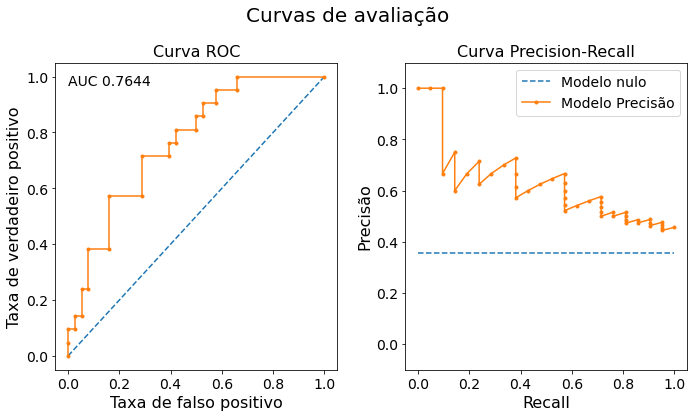

In [21]:
plot_eval_curves(data = main_split, model = m2_eval, title = "Precisão")

A trajetória da curva ROC-AUC mantém-se relativamente semelhante; enquanto que a curva PC na verdade se mostrou melhor que o modelo anterior, não apresentando a queda brusca observada logo no início do outro modelo.

De forma geral, isso poderia representar uma melhora deste modelo em relação ao anterior, mas a distribuição dos parâmetros por validação cruzada indica que a performance geral deste modelo é mais baixa.

## Modelo que maximiza AUC: m3

In [22]:
m3 = make_pipeline(
    SelectPercentile(score_func=f_classif, percentile=60),
    RandomForestClassifier(bootstrap=True, criterion="gini", max_features=0.1, 
                           min_samples_leaf=18, min_samples_split=9, n_estimators=100,
                            random_state = 78329)
)

In [23]:
m3_eval = m3.fit(X = main_split[0], y = main_split[2])

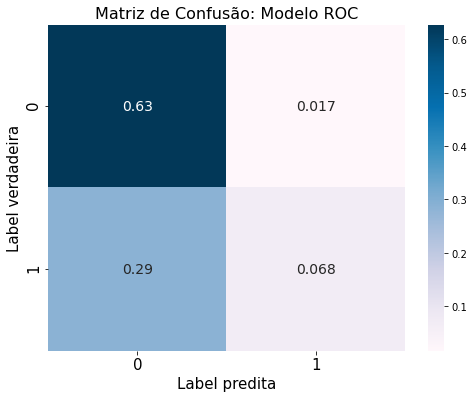

In [24]:
plot_confusion_matrix_params(data = main_split, model = m3_eval, title = "ROC")

O modelo que busca maximizar o AUC apresenta um resultado muito similar ao modelo anterior. Isso é esperado, dada a sua semelhança: este modelo possui apenas um passo a mais quando comparado ao anterior, sem muitas alterações nos hiperparâmetros.

Novamente, temos um valor muito alto de falsos negativos e baixo de verdadeiros positivos.

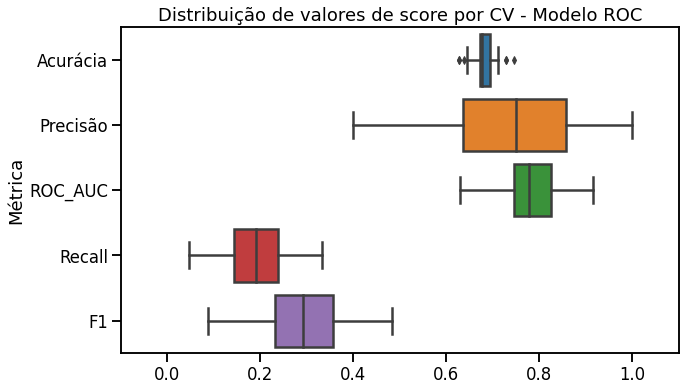

In [25]:
m3_scores = multi_score_cv(model = m3, x = x, y = y, cv = cv,
                           title = "ROC")

Novamente, como esperado, o padrão encontrado é de baixa recall e F1, com grande variação na precisão.

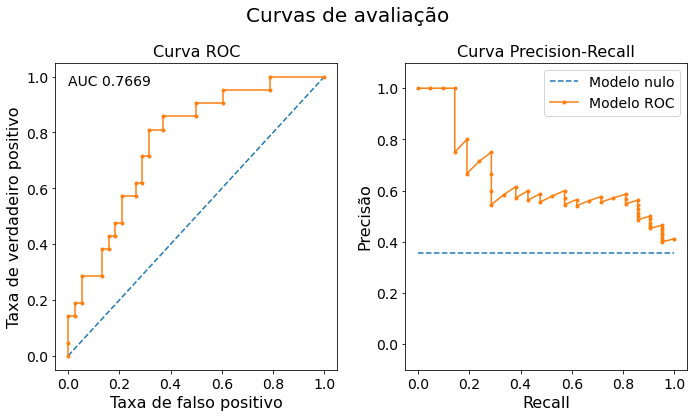

In [26]:
plot_eval_curves(data = main_split, model = m3_eval, title = "ROC")

Aqui ainda vemos o padrão persistente de performance relativamente boa prevista pela curva ROC, com o padrão da curva PC também melhor em relação ao anterior.

## Modelo que maximiza recall: m4

In [27]:
m4 = make_pipeline(
    StackingEstimator(estimator=RandomForestClassifier(bootstrap=True, criterion="gini",
     max_features=0.05, min_samples_leaf=2, min_samples_split=14, n_estimators=100,
                            random_state = 78329)),
    StandardScaler(),
    SelectFwe(score_func=f_classif, alpha=0.02),
    BernoulliNB(alpha=0.001, fit_prior=False)
)

In [28]:
m4_eval = m4.fit(X = main_split[0], y = main_split[2])

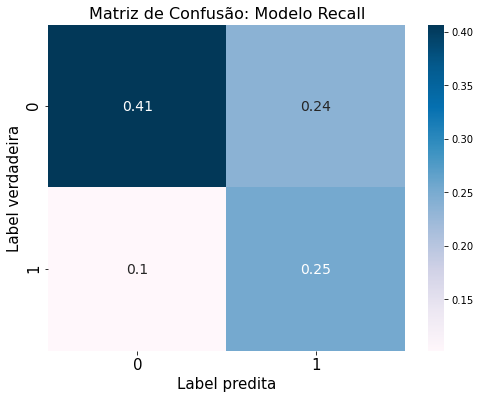

In [29]:
plot_confusion_matrix_params(data = main_split, model = m4_eval, title = "Recall")

Um padrão curioso agora se faz presente. Ao tentar maximizar o recall, obtemos o resultado esperado: diminuimos o valor de falsos negativos e aumentamos o valor de verdadeiros positivos. Porém, também aumentamos o valor de falsos positivos. A longo prazo, esse efeito também é indesejado: a internação de uma pessoa em um leito de UTI é um procedimento muito custoso, tanto para o sistema de saúde quanto para o paciente. Se o modelo prevê que muitos pacientes que não precisam de UTI sejam internados, isso pode gerar uma sobrecarga do sistema de saúde. A médio prazo porém, esse efeito pode ser amenizado pois o paciente pode acabar não ficando muito tempo internado; mas essa interpretação deve ser feita com muita cautela.

Para efeito do exercício, podemos estar mais interessados em um modelo com maior taxa de falsos positivos em relação aos falsos negativos.


---

Vamos examinar os outros resultados do modelo:

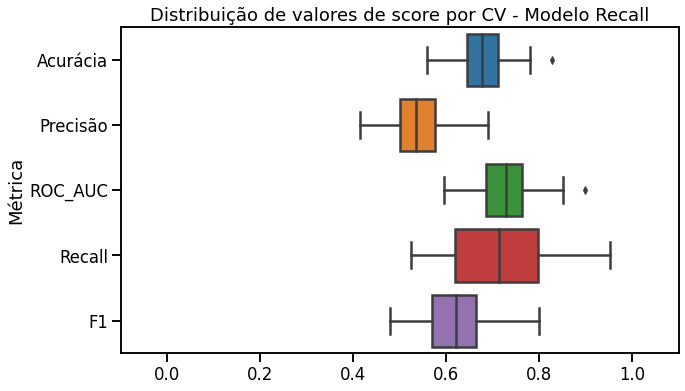

In [30]:
m4_scores = multi_score_cv(model = m4, x = x, y = y, cv = cv,
                           title = "Recall")

Como esperado, este modelo apresenta uma melhora significativa nos valores de recall, e, por consequência, de F1. Também apresenta valores razoáveis das outras métricas, com alta acurácia, a custo de uma precisão um pouco menor, mas com menor variação.

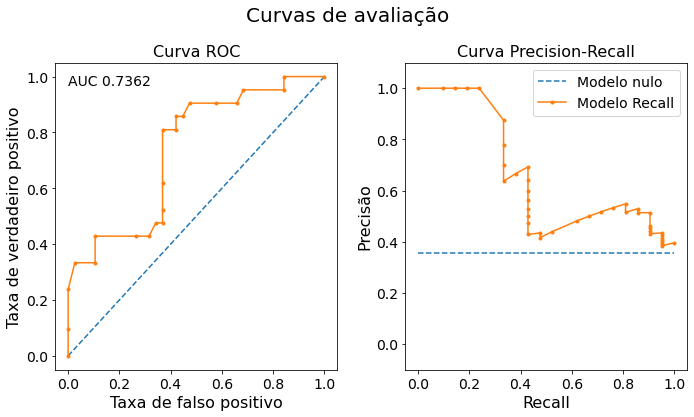

In [31]:
plot_eval_curves(data = main_split, model = m4_eval, title = "Recall")

Esse modelo apresenta uma distorção em torno dos valores médios, de 0.4 para taxa de falso positivo e de recall. É um resultado difícil de ser interpretado, que leva à uma pequena queda na AUC; mas os padrões gerais das curva são os melhores representados até aqui.

---

Por último, vamos examinar o modelo que maximiza o valor de F1.

## Modelo que maximiza F1: m5

In [32]:
m5 = make_pipeline(
    ZeroCount(),
    RandomForestClassifier(bootstrap=True, criterion="gini", max_features=0.7500000000000001,
                           min_samples_leaf=15, min_samples_split=13, n_estimators=100,
                            random_state = 78329)
)

In [33]:
m5_eval = m5.fit(X = main_split[0], y = main_split[2])

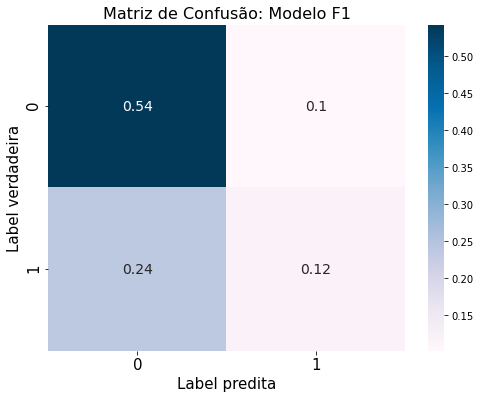

In [34]:
plot_confusion_matrix_params(data = main_split, model = m5_eval, title = "F1")

Novamente este modelo aponta para o resultado dos modelos inicais: maiores taxas de predição de valores 0, porém sem que a taxa de falsos negativos seja muito mais alta que as demais, como no caso dos modelos de precisão e ROC.

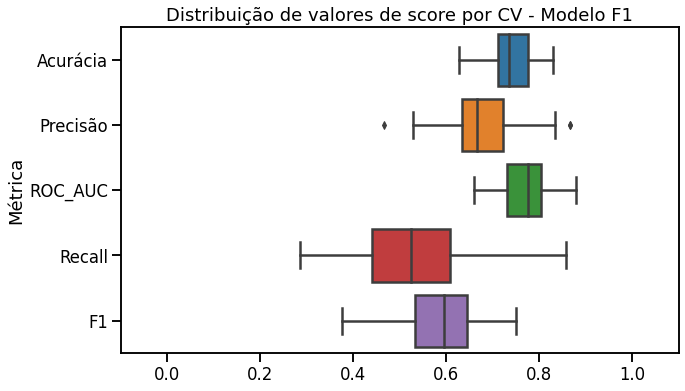

In [35]:
m5_scores = multi_score_cv(model = m5, x = x, y = y, cv = cv,
                           title = "F1")

As distribuições das métricas também se assemelham ao resultado do modelo de acurácia, mas também há uma variação muito grande da própria métrica F1 e recall relativamente mais baixo.

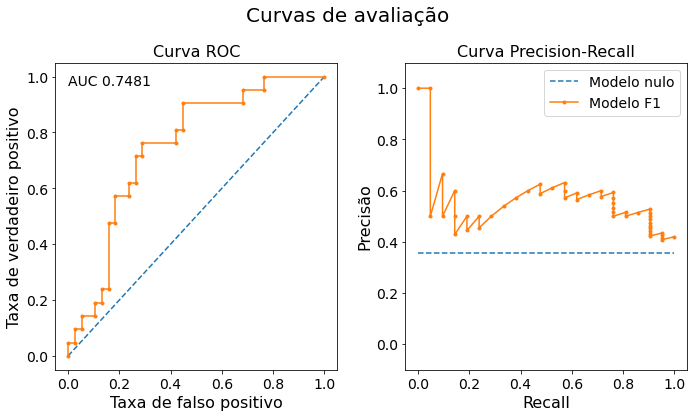

In [36]:
plot_eval_curves(data = main_split, model = m5_eval, title = "F1")

Por fim, o diagnóstico das curvas também indica que uma queda de performance à luz da curva PC, ficando pouco acima do modelo nulo.

# Conclusões

Não existe um modelo ideal, e nem sempre o melhor modelo é um excelente modelo. Ao buscar maximizar uma única métrica de avaliação do modelo, o algoritmo de busca por AutoML acabou por penalizar os modelos em direções diferentes: ao tentar diminuir a taxa de falsos negativos, aumenta a taxa de falsos positivos e vice-versa. Os melhores modelos possivelmente residem no meio do caminho entre esses dois compromissos.

No nosso caso, temos um objetivo claro: identificar corretamente a necessidade de um paciente ser internado em um leito de UTI com covid. Dessa forma, tanto os modelos que maximizaram a acurácia, F1 e recall atendem a esses propósitos. De forma geral, o modelo que maximiza a acurácia é o que melhor distribui os resultados entre as classes não verdadeiro negativo da matriz de confusão. O modelo que maximiza F1 apresenta resultados um pouco mais consistentes à luz das curvas ROC e PR, com resultados praticamente idênticos na distribuição dos scores de métricas por validação cruzada. Por fim, o modelo que maximiza recall é penalizado por uma taxa maior de falso positivo, mas é o que tem a maior taxa de verdadeiros positivos, e maiores distribuições dos scores de validação cruzada, com menor variação.

Uma ressalva importante a ser observada também é que essa melhor habilidade do modelo recall medida por menor variação dos scores de validação cruzada poder ser resultado do maior tempo de otimização dos hiperparâmetros. Como vimos no procedimento de busca de modelos e hiperparâmetros do TPOT, a recall é a métrica mais sensível, pois apresenta maior variação de ganho de performance, o que me motivou a aplicar mais tempo na busca. Talvez aplicar mais tempo na busca dos outros parâmetros também levasse a resultados melhores para os outros parâmetros.

Outro padrão interessante a ser discutido é como as diferentes métricas de avaliação relevam propriedades diferentes dos modelos. Se examinássemos somente o valor de AUC e curva ROC, provavelmente julgaríamos que todos os modelos seriam bons modelos. Vimos que isso não necessariamente é verdade, pois a curva ROC tende a dar grande importância a taxa de verdadeiros negativos, que, muitas vezes, não é o parâmetro mais informativo de um modelo. No nosso caso, todos os modelos tiveram taxas igualmente boas de verdadeiros negativos, e isso também é uma consequência do desbalanceamento dos nossos dados, com mais classes 0 do que 1. Essa distorção da leitura da curva ROC é [bastante discutida](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4349800/) na literatura, e não é uma discussão [recente](https://dl.acm.org/doi/10.1145/65943.65945). Por isso, olhamos também para a curva PC e a distribuição dos scores de métricas de avaliação por validação cruzada. A vantagem de utilizar a validação cruzada é que o processo foi repetido diversas vezes e os resultados foram examinados de forma a incorporar a aleatoriedade do processo de separação em dados de treino e dados de teste. 

Uma boa avaliação de um modelo depende de vários fatores, assim como uma boa seleção de modelos. A efetividade geral dos modelos finais pode ser melhorado, e muito, a depender da busca de outros parâmetros. Se escolheremos o modelo que maximiza Recall, teremos uma previsão muito boa dos casos positivos, mas podemos acabar superestimando esses valores e prevendo que pessoas que não necessitam de UTI sejam internadas. Esse também não é o resultado mais desejado, pois como discutimos, gera uma sobrecarga no sistema de saúde. Em situações menos estressantes, modelos com alto recall mas que geram altas taxas de falso positivo podem ser melhor aplicados, em que o custo de um "excesso de cuidado" pode ser mais baixo do que o caso apresentado. A fim de buscar um melhor compromisso entre esses tipos de erro nas previsões, o primeiro passo seria realizar buscas mais exaustivas, tanto de modelos quanto de hiperparamêtros. Como vimos, a própria documentação do TPOT recomenda que a busca seja feita de forma exaustiva. Porém, isso requer uma alocação muito grande de recursos, o que pode limitar o escopo do projeto.

Outras possibilidades incluem o uso de outras ferramentas de AutoML. Afinal, temos uma grande variedade de algoritmos à disposição, e essa busca também pode ser uma busca exaustiva: "qual o melhor algoritmo de AutoML?" não é uma pergunta muito diferente de "qual o melhor modelo?". A separação dos passos de busca de melhor modelo e melhores hiperparâmetros também pode ser frutífera, iniciando-se primeiro a busca por tipos de modelos mais recomendados para o tipo de problema em questão, e depois o teste de hiperparâmetros, com ferramentas como [Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Ainda uma outra possibilidade que não explorei é a busca por [Feature Importance](https://machinelearningmastery.com/calculate-feature-importance-with-python/), que pode ajudar a revelar quais as características mais importantes dos dados para a previsão. Por exemplo, um estudo de Feature Importance pode ajudar a resolver algumas questões muito debatidas no cenário da COVID: quais são os [grupos de risco](https://coronavirus.saude.mg.gov.br/blog/84-grupos-de-risco-para-covid-19)? O que será que influenciou mais as decisões dos algoritmos de Machine Learning, a idade das pessoas ou doenças pré-existentes? Vimos marginalmente essa discussão na análise exploratória de dados, mas apenas fizemos uma comparação visual dessas categorias, que poderiam ser melhor exploradas com feature importance, um próximo passo interessantes para o projeto.

# Referências

https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/

https://towardsdatascience.com/classification-metrics-confusion-matrix-explained-7c7abe4e9543

https://towardsdatascience.com/various-ways-to-evaluate-a-machine-learning-models-performance-230449055f15

https://scholar.google.com/scholar?hl=pt-BR&as_sdt=0%2C5&q=evaluation+machine+learning+models&btnG

https://scholar.google.com/scholar?as_ylo=2021&q=evaluation+machine+learning+models&hl=pt-BR&as_sdt=0,5

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

https://dl.acm.org/doi/10.1145/1143844.1143874

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4349800/

https://dl.acm.org/doi/10.1145/65943.65945

https://machinelearningmastery.com/calculate-feature-importance-with-python/

https://coronavirus.saude.mg.gov.br/blog/84-grupos-de-risco-para-covid-19